In [3]:
# Initial imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [4]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the requests Library

In [5]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Add format specifier to request url

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [8]:
# Execute GET request and store response

response_data_btc = requests.get(btc_url)
response_data_eth = requests.get(eth_url)

In [9]:
# Get content

response_content_btc = response_data_btc.content
response_content_eth = response_data_eth.content

# Formatting as json

data_btc = response_data_btc.json()
data_eth = response_data_eth.json()

# Add indents to JSON and output to screen

print(json.dumps(data_btc, indent=4))
print(json.dumps(data_eth, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19148362,
            "total_supply": 19148362,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 21730.0,
                    "volume_24h": 35652797064,
                    "market_cap": 415991974555,
                    "percentage_change_1h": 0.331560603059346,
                    "percentage_change_24h": 0.578942117646181,
                    "percentage_change_7d": 8.75841871788005,
                    "percent_change_1h": 0.331560603059346,
                    "percent_change_24h": 0.578942117646181,
                    "percent_change_7d": 8.75841871788005
                }
            },
            "last_updated": 1662959975
        }
    },
    "metadata": {
        "timestamp": 1662959975,
        "num_crypt

In [10]:
# Get btc and eth values

btc_price = data_btc["data"]["1"]["quotes"]["USD"]['price']
eth_price = data_eth["data"]["1027"]["quotes"]["USD"]['price']

# Compute current value of my crypto

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $26076.00
The current value of your 5.3 ETH is $9154.64


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [11]:
# Set current amount of shares

my_agg = 200
my_spy = 50

In [12]:
# Setup Alpaca API environment

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [13]:
# Set timeframe to "1Day"

timeframe = "1Day"

# Set start and end datetimes of the same day to get 1 days closing data.

start_date = pd.Timestamp("2022-09-08", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-08", tz="America/New_York").isoformat()

# Set the stock tickers

ticker =["AGG", "SPY"]

# Get 1 year's worth of historical data
df_ticker = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-09-08 04:00:00+00:00,100.00,100.18,99.785,99.79,5409039,15792,99.984992,AGG
2022-09-08 04:00:00+00:00,395.45,400.86,394.120,400.38,80177250,549029,398.315491,SPY


In [14]:
# Reorganize the DataFrame

# Separate ticker data

AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                              \
                            open    high     low  close   volume trade_count   
timestamp                                                                      
2022-09-08 04:00:00+00:00  100.0  100.18  99.785  99.79  5409039       15792   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-09-08 04:00:00+00:00  99.984992  395.45  400.86  394.12  400.38   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2022-09-08 04:00:00+00:00  80177250      549029  398.315491

In [15]:
# Pick AGG and SPY close prices

agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.79
Current SPY closing price: $400.38


In [16]:
# Compute the current value of shares

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares

print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20019.00
The current value of your 200 AGG shares is $19958.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data

total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value

# Create savings DataFrame

dict_portfolio = {'Ticker':['Crypto', 'Shares'], 'Amount': [total_crypto_value, total_shares_value]}
df_portfolio = pd.DataFrame(dict_portfolio)
df_portfolio = df_portfolio.set_index('Ticker')
df_portfolio.index.name = None

# Display savings DataFrame

df_portfolio

,Amount
Crypto,35230.637
Shares,39977.000


<AxesSubplot:ylabel='Amount'>

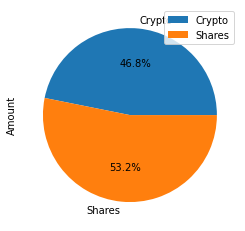

In [18]:
# Plot savings pie chart

df_portfolio.plot.pie(y = "Amount", autopct='%1.1f%%')

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value

# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal.")
elif total_savings < emergency_fund:
    print("You have " + "$" + str(emergency_fund - total_savings) + " to go until you reach your goal.")    

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.

start_date = pd.Timestamp('2017-09-08', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-08', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
df_five_year = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame

# Separate ticker data

AGG = df_five_year[df_five_year["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_five_year[df_five_year["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames

df_five_year = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data

df_five_year.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-09-08 04:00:00+00:00  110.54  110.58  110.43  110.44  2363231   
2017-09-11 04:00:00+00:00  110.27  110.29  110.10  110.14  2492743   
2017-09-12 04:00:00+00:00  110.04  110.06  109.92  109.98  2403562   
2017-09-13 04:00:00+00:00  110.00  110.04  109.86  109.87  1304102   
2017-09-14 04:00:00+00:00  109.81  109.97  109.81  109.93  1704216   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-09-08 04:00:00+00:00        9370  110.471812  246.54  247.11  246.30   
2017-09-11 04:00:00+00:00       10614  110.194231  248.04  249.30  248.02   
2017-09-12 04:00:00+00:00        8614  109.979269  249.64  250.09  249.42   
2017-09-13 04:00:00+00:00        6565  109.926598  249.73  250.21  249.59   
2017-09-14 04:00:00+00:00        7111  109.914840  249.83  250.32  249.60   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-09-08 04:00:00+00:00  246.58  63832825      185692  246.653947  
2017-09-11 04:00:00+00:00  249.21  71364848      211601  248.758253  
2017-09-12 04:00:00+00:00  250.05  56896027      192649  249.791314  
2017-09-13 04:00:00+00:00  250.17  59228002      147055  250.040408  
2017-09-14 04:00:00+00:00  250.09  95446349      188794  250.052841

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns (40% bonds / 60% shares)

MC_thirty_year = MCSimulation(
    portfolio_data = df_five_year,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data

MC_thirty_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-09-08 04:00:00+00:00  110.54  110.58  110.43  110.44  2363231   
2017-09-11 04:00:00+00:00  110.27  110.29  110.10  110.14  2492743   
2017-09-12 04:00:00+00:00  110.04  110.06  109.92  109.98  2403562   
2017-09-13 04:00:00+00:00  110.00  110.04  109.86  109.87  1304102   
2017-09-14 04:00:00+00:00  109.81  109.97  109.81  109.93  1704216   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-08 04:00:00+00:00        9370  110.471812          NaN  246.54   
2017-09-11 04:00:00+00:00       10614  110.194231    -0.002716  248.04   
2017-09-12 04:00:00+00:00        8614  109.979269    -0.001453  249.64   
2017-09-13 04:00:00+00:00        6565  109.926598    -0.001000  249.73   
2017-09-14 04:00:00+00:00        7111  109.914840     0.000546  249.83   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-09-08 04:00:00+00:00  247.11  246.30  246.58  63832825      185692   
2017-09-11 04:00:00+00:00  249.30  248.02  249.21  71364848      211601   
2017-09-12 04:00:00+00:00  250.09  249.42  250.05  56896027      192649   
2017-09-13 04:00:00+00:00  250.21  249.59  250.17  59228002      147055   
2017-09-14 04:00:00+00:00  250.32  249.60  250.09  95446349      188794   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-08 04:00:00+00:00  246.653947          NaN  
2017-09-11 04:00:00+00:00  248.758253     0.010666  
2017-09-12 04:00:00+00:00  249.791314     0.003371  
2017-09-13 04:00:00+00:00  250.040408     0.000480  
2017-09-14 04:00:00+00:00  250.052841    -0.000320

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\TechFast Australia\Desktop\Jupyter-Workspace\API\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002981,1.001396,1.013880,0.999365,0.991139,0.999355,1.000153,0.997220,1.000224,1.003608,...,1.007836,0.995175,1.002362,1.016042,1.000331,1.002892,0.999035,1.006943,0.992179,1.002967
2,1.004570,1.005717,1.012148,0.995527,1.007652,1.001538,1.000376,0.991823,0.999002,0.997322,...,1.003297,0.993126,0.984842,1.012954,1.002011,1.004683,1.004200,1.007853,0.990158,1.002073
3,0.996771,1.005471,1.006405,1.004392,1.014825,0.999408,1.008947,0.987291,0.996899,0.994479,...,0.999383,0.994875,0.992689,1.008416,0.989456,0.997864,1.004819,0.996159,0.996998,0.977265
4,0.992425,1.000059,1.012142,1.006532,1.009832,0.998532,0.999595,0.983258,1.014832,0.998880,...,0.988446,1.001466,1.005974,0.997509,0.976562,0.997131,1.004385,1.006836,1.005723,0.980339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.758242,5.680541,13.307109,7.736221,7.683991,10.250086,3.983168,4.353239,3.106143,7.668759,...,4.013413,4.202215,2.409299,7.333782,6.088795,4.760436,6.413636,9.558986,3.409676,12.972309
7557,7.778029,5.710332,12.962829,7.775822,7.588849,10.145072,3.992313,4.258871,3.116694,7.776794,...,4.004893,4.150863,2.425972,7.331756,6.091816,4.784976,6.432457,9.613821,3.397817,12.897165
7558,7.762101,5.695448,12.871982,7.825311,7.536007,10.144541,3.999614,4.258498,3.141794,7.810938,...,4.019051,4.111701,2.418730,7.309332,5.999597,4.786946,6.417979,9.670483,3.432397,12.764835
7559,7.725224,5.709681,12.876716,7.943118,7.531913,10.018368,4.021806,4.288170,3.131434,7.681069,...,4.052934,4.111579,2.431437,7.305290,5.903589,4.805569,6.491025,9.735706,3.482009,12.717281


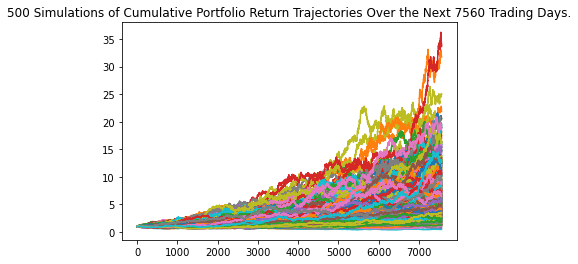

In [24]:
# Plot simulation outcomes

line_plot = MC_thirty_year.plot_simulation()

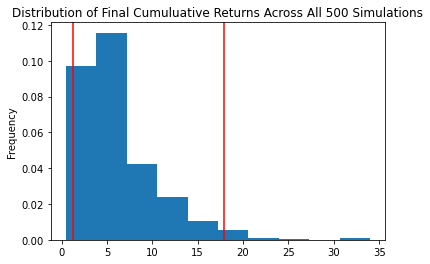

In [25]:
# Plot probability distribution and confidence intervals

dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_thirty_year = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics

print(tbl_thirty_year)

count           500.000000
mean              6.297678
std               4.423722
min               0.472971
25%               3.283979
50%               5.230485
75%               7.738712
max              34.005053
95% CI Lower      1.269529
95% CI Upper     17.871498
Name: 7560, dtype: float64


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl_thirty_year[8]*initial_investment,2)
ci_upper = round(tbl_thirty_year[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $25390.58 and $357429.96


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(tbl_thirty_year[8]*initial_investment,2)
ci_upper = round(tbl_thirty_year[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $38085.87 and $536144.94


### Optional Challenge - Early Retirement

#### Five Years Retirement Option - 90% shares / 10% bonds

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_five_year = MCSimulation(
    portfolio_data = df_five_year,
    weights = [.1,.9],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data

MC_five_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-09-08 04:00:00+00:00  110.54  110.58  110.43  110.44  2363231   
2017-09-11 04:00:00+00:00  110.27  110.29  110.10  110.14  2492743   
2017-09-12 04:00:00+00:00  110.04  110.06  109.92  109.98  2403562   
2017-09-13 04:00:00+00:00  110.00  110.04  109.86  109.87  1304102   
2017-09-14 04:00:00+00:00  109.81  109.97  109.81  109.93  1704216   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-08 04:00:00+00:00        9370  110.471812          NaN  246.54   
2017-09-11 04:00:00+00:00       10614  110.194231    -0.002716  248.04   
2017-09-12 04:00:00+00:00        8614  109.979269    -0.001453  249.64   
2017-09-13 04:00:00+00:00        6565  109.926598    -0.001000  249.73   
2017-09-14 04:00:00+00:00        7111  109.914840     0.000546  249.83   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-09-08 04:00:00+00:00  247.11  246.30  246.58  63832825      185692   
2017-09-11 04:00:00+00:00  249.30  248.02  249.21  71364848      211601   
2017-09-12 04:00:00+00:00  250.09  249.42  250.05  56896027      192649   
2017-09-13 04:00:00+00:00  250.21  249.59  250.17  59228002      147055   
2017-09-14 04:00:00+00:00  250.32  249.60  250.09  95446349      188794   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-08 04:00:00+00:00  246.653947          NaN  
2017-09-11 04:00:00+00:00  248.758253     0.010666  
2017-09-12 04:00:00+00:00  249.791314     0.003371  
2017-09-13 04:00:00+00:00  250.040408     0.000480  
2017-09-14 04:00:00+00:00  250.052841    -0.000320

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\TechFast Australia\Desktop\Jupyter-Workspace\API\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.967674,0.990021,1.031872,0.995989,1.017129,0.993989,1.005735,1.003583,0.980330,1.004740,...,1.021540,0.999097,1.004444,0.993432,0.991838,0.995078,0.994368,0.988238,0.999710,1.017875
2,0.985446,1.009740,1.017802,1.002230,1.023238,0.974094,1.007484,0.977376,0.978032,1.005509,...,1.019064,1.010599,1.025550,0.999450,0.972155,0.972745,0.991973,0.968856,1.001525,1.018635
3,0.984022,1.013506,1.020954,0.998665,1.022869,0.994999,1.014792,0.982173,0.979265,1.008487,...,1.018332,1.014219,1.021692,0.991697,0.974620,0.968666,0.988489,0.971846,1.001229,1.021925
4,0.979779,1.011914,1.030917,1.005819,1.037353,1.006656,1.045894,0.986964,0.989916,1.010698,...,1.004337,1.013590,1.028465,1.008168,0.941472,0.972179,0.967640,0.963005,0.999656,1.033122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.446792,1.164745,1.560185,1.734338,1.291342,1.295907,1.741621,2.213910,0.957443,2.089933,...,1.405279,1.291403,1.408310,1.072008,0.814965,1.393061,1.781317,1.249339,1.238317,1.430616
1257,1.442226,1.198533,1.555094,1.712400,1.283984,1.305988,1.695047,2.226077,0.961123,2.121721,...,1.430716,1.284359,1.410279,1.073505,0.813248,1.413750,1.778436,1.236418,1.221597,1.423657
1258,1.445343,1.195014,1.586580,1.714417,1.275943,1.305153,1.718501,2.216911,0.970595,2.133332,...,1.435179,1.268096,1.403646,1.073652,0.822179,1.448411,1.782339,1.237752,1.196878,1.439055
1259,1.450969,1.179110,1.579567,1.740532,1.255475,1.317843,1.689567,2.186789,0.975443,2.117762,...,1.425707,1.259642,1.414264,1.060415,0.831979,1.432764,1.769513,1.204155,1.175130,1.427814


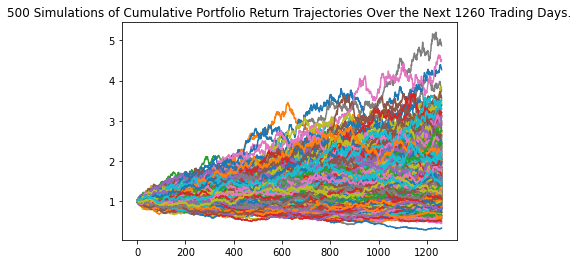

In [31]:
# Plot simulation outcomes

line_plot_1 = MC_five_year.plot_simulation()

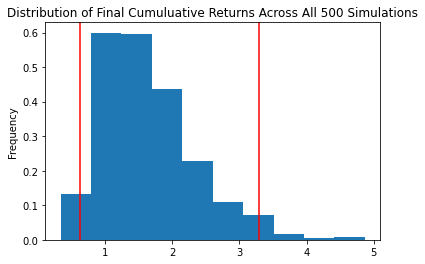

In [32]:
# Plot probability distribution and confidence intervals

dist_plot_2 = MC_five_year.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_five_year = MC_five_year.summarize_cumulative_return()

# Print summary statistics

print(tbl_five_year)

count           500.000000
mean              1.628350
std               0.698164
min               0.332116
25%               1.127895
50%               1.473918
75%               2.015686
max               4.869549
95% CI Lower      0.628515
95% CI Upper      3.294631
Name: 1260, dtype: float64


In [34]:
# Set initial investment (higher initial investment, $40000)

initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $40,000

ci_lower = round(tbl_five_year[8]*initial_investment,2)
ci_upper = round(tbl_five_year[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $25140.58 and $131785.23


#### Ten Years Retirement Option - 99% shares / 1% bonds

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_ten_year = MCSimulation(
    portfolio_data = df_five_year,
    weights = [.01,.99],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data

MC_ten_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-09-08 04:00:00+00:00  110.54  110.58  110.43  110.44  2363231   
2017-09-11 04:00:00+00:00  110.27  110.29  110.10  110.14  2492743   
2017-09-12 04:00:00+00:00  110.04  110.06  109.92  109.98  2403562   
2017-09-13 04:00:00+00:00  110.00  110.04  109.86  109.87  1304102   
2017-09-14 04:00:00+00:00  109.81  109.97  109.81  109.93  1704216   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-08 04:00:00+00:00        9370  110.471812          NaN  246.54   
2017-09-11 04:00:00+00:00       10614  110.194231    -0.002716  248.04   
2017-09-12 04:00:00+00:00        8614  109.979269    -0.001453  249.64   
2017-09-13 04:00:00+00:00        6565  109.926598    -0.001000  249.73   
2017-09-14 04:00:00+00:00        7111  109.914840     0.000546  249.83   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-09-08 04:00:00+00:00  247.11  246.30  246.58  63832825      185692   
2017-09-11 04:00:00+00:00  249.30  248.02  249.21  71364848      211601   
2017-09-12 04:00:00+00:00  250.09  249.42  250.05  56896027      192649   
2017-09-13 04:00:00+00:00  250.21  249.59  250.17  59228002      147055   
2017-09-14 04:00:00+00:00  250.32  249.60  250.09  95446349      188794   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-08 04:00:00+00:00  246.653947          NaN  
2017-09-11 04:00:00+00:00  248.758253     0.010666  
2017-09-12 04:00:00+00:00  249.791314     0.003371  
2017-09-13 04:00:00+00:00  250.040408     0.000480  
2017-09-14 04:00:00+00:00  250.052841    -0.000320

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\TechFast Australia\Desktop\Jupyter-Workspace\API\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997721,0.990939,1.004954,0.967173,0.986835,1.010864,0.995193,1.010843,1.002117,1.004536,...,1.000125,1.004011,0.995619,0.997184,0.990239,0.989494,1.003444,0.995768,1.007510,0.997464
2,1.026927,0.988417,1.014276,0.946622,0.986435,0.997771,0.973190,0.990634,1.004176,1.009496,...,0.999776,1.015394,0.993833,1.014050,0.982348,1.010984,1.001517,0.996182,0.975908,1.009165
3,1.018858,0.989203,1.025628,0.957535,0.966898,1.000497,1.008673,0.986610,0.999348,1.006425,...,1.008147,0.995339,0.984428,1.007193,0.993648,0.998441,1.028800,1.006344,0.956405,1.020439
4,1.036632,0.987896,1.040854,0.961550,0.963123,0.983500,0.993684,0.990678,0.999532,1.006047,...,1.007492,0.995284,0.985495,1.021176,0.994775,1.009653,1.041559,1.011799,0.966054,0.993345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.628808,3.231893,1.329584,4.818434,1.607736,3.764247,3.658598,4.922935,2.760189,1.361497,...,2.050578,1.586584,8.087467,1.052744,2.214590,5.489692,3.758811,1.409057,4.356165,2.286139
2517,5.641121,3.206657,1.367157,4.747277,1.651160,3.801015,3.643840,5.017018,2.810987,1.353260,...,2.095207,1.574952,7.958150,1.054834,2.178067,5.473946,3.777240,1.395619,4.345211,2.310663
2518,5.577805,3.203728,1.350356,4.757331,1.645746,3.733653,3.538699,4.947131,2.794461,1.343100,...,2.074581,1.600247,7.964277,1.047801,2.174838,5.550704,3.740051,1.424357,4.307214,2.347183
2519,5.527194,3.224253,1.339495,4.761068,1.679632,3.776370,3.514654,4.934576,2.807886,1.324152,...,2.024381,1.596125,7.953591,1.067069,2.191674,5.542598,3.756277,1.422241,4.302590,2.384703


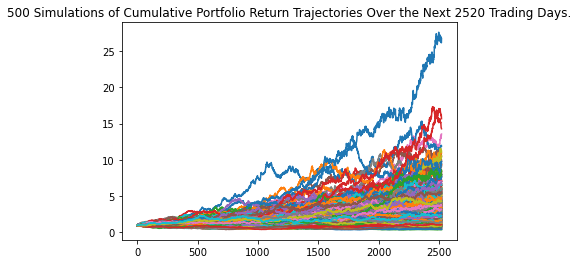

In [37]:
# Plot simulation outcomes

line_plot_2 = MC_ten_year.plot_simulation()

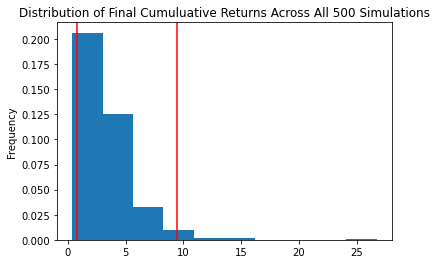

In [38]:
# Plot probability distribution and confidence intervals

dist_plot_3 = MC_ten_year.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_ten_year = MC_ten_year.summarize_cumulative_return()

# Print summary statistics

print(tbl_ten_year)

count           500.000000
mean              3.363215
std               2.431205
min               0.372752
25%               1.724362
50%               2.790322
75%               4.186910
max              26.723895
95% CI Lower      0.785471
95% CI Upper      9.418951
Name: 2520, dtype: float64


In [40]:
# Set initial investment (highest initial investment, $60000)

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $40,000
ci_lower = round(tbl_ten_year[8]*initial_investment,2)
ci_upper = round(tbl_ten_year[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $47128.27 and $565137.07
